# Probabilidad

## Algunos Conceptos.

### Variables Aleatorias.

Una variable aleatoria depende de eventos aleatorios; su definición formal apunta a una función que asocia los posibles resultados de un espacio dado con cantidades numericas. Como ejemplo, siempre se recurre al lanzamiento de una moneda o un dado:

Si se lanza una moneda, los dos posibles resultados: <i>cara</i>, <i>sello</i>. la variable aleatoria <i>X</i>, haría lo siguiente: 

$$X(cara)=0$$
$$X(sello)=1$$

Analogamente para el lanzamiento de un dado, y otros similares.

En otras palabras las variables aleatorias establecen un <i>mapeo</i> entre resultados y cantidades numéricas.

Se debe mencionar también que estas funciones, llamadas <i>variables aleatorias</i>, pueden ser discretas o contínuas:

- Si son discretas, sus resultados se asocian con números pertenecientes al conjunto de los enteros.

- Si son continuas, asocian los resultados a un rango de valores perteneciente a los números reales. 

Supongámos un dado, usando el modulo <i>numpy</i>, podemos emular un dado: 

In [1]:
import numpy as np

In [2]:
# un lanzamiento del dado

np.random.choice([1, 2, 3, 4, 5, 6], size=1).tolist()

[3]

In [3]:
# 10 lanzamientos
np.random.choice([1, 2, 3, 4, 5, 6], size=10).tolist()

[5, 4, 2, 3, 2, 2, 6, 4, 1, 2]

Ahora es claro que, en el caso del dado, los resultados posibles son: 1, 2, 3, 4, 5, 6. Ese sería su espació muestral; entonces la probabilidad de un evento cualquiera <i>A</i> definido sobre esos resultados sería:

$$P(A)=\frac{n°casos\;favorables\;\; a\; A}{{n°casos\;\;totales}}$$

Asi, por ejemplo, el evento A = que el resultado del dado sea inferior 4. 

$$P(A)=\frac{3}{{6}}$$

Mientras que la probabilidad para cualquiera de las caras del dado es $\frac{1}{{6}}$.

De aquí se desprende que la probabilidad de que esa variable aleatoria dé un valor menor o mayor a un número particular es la probabilidad acumulada.

In [4]:
import matplotlib.pyplot as plt

In [13]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.figsize'] = (10, 6)

In [14]:
dado = np.repeat(1/6, 6)

# Espacio muestral
em = [1, 2, 3, 4, 5, 6]

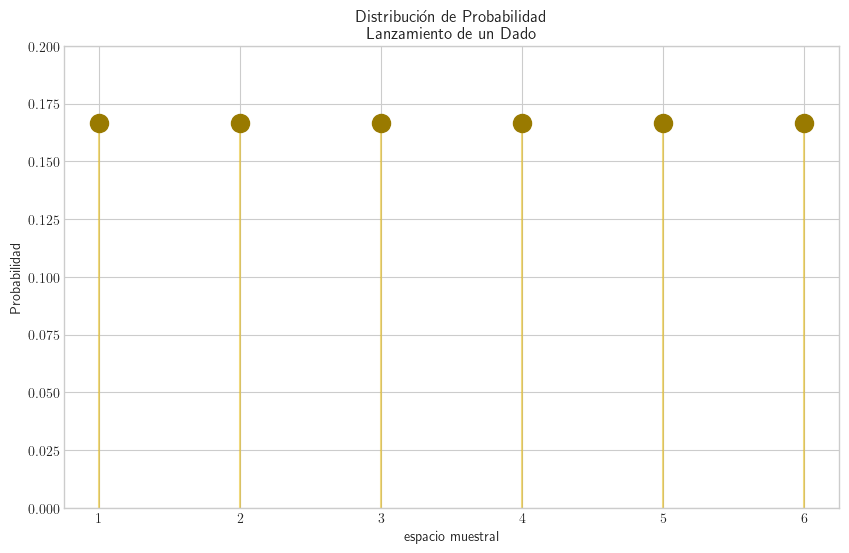

In [29]:
fig, ax = plt.subplots()
ax.vlines(em, 0, dado,  linestyles='-', alpha=0.5, color='#e6b800')
ax.plot(em, dado, marker='o', markersize=13, linestyle='None',color='#997a00')
plt.title('Distribución de Probabilidad\nLanzamiento de un Dado')
plt.ylim(0, 0.20)
plt.xlabel('espacio muestral')
plt.ylabel('Probabilidad')
plt.show()

In [22]:
cum_dado = np.cumsum(dado)


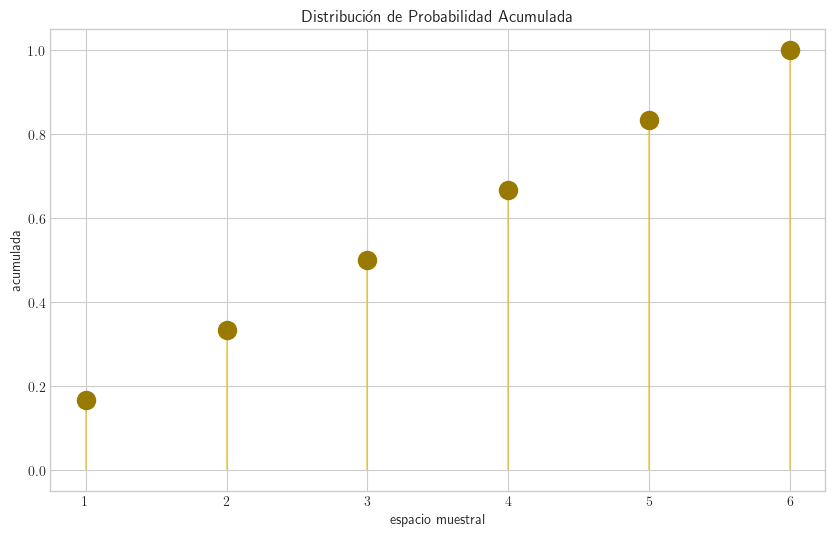

In [30]:
ig, ax = plt.subplots()

ax.vlines(em, 0, cum_dado,  linestyles='-', alpha=0.5, color='#e6b800')
ax.plot(em, cum_dado, marker='o', markersize=13, linestyle='None',color='#997a00')
plt.title('Distribución de Probabilidad Acumulada')
plt.xlabel('espacio muestral')
plt.ylabel('acumulada')
plt.show()

En el gráfico puede verse que la probabilidad acumulada de obtener un número inferior a 4 está por el 50%, la probabilidad de obtener un número inferior a 6 está por encima del 80%, etc.

Además la suma de todas las probabilidades es uno.

### Ensayos Bernoulli

Son <i>experimentos</i> con dos posibles resultados, como el caso mencionado de la moneda.

Cuando se considera la posibilidad de obtener una cantidad específica de uno de esos dos resultados, y a ese resultado específico se le denomina exito; esa serie de ensayos se distribuyen según la probilidad binomial.

Si son <i>x</i> resultados denominados <i>exitos</i>, obtenidos de una serie de <i>n</i> ensayos, se tiene:

$$x \sim B(n, p)$$


y la función de probabilidad es:

$$P(x)=\binom{n}{x} \cdot p^x \cdot (1-p)^{n-x}$$

Esta función nos da la probabilidad de obtener x exitos en n ensayos <i>Bernoulli</i>.

Allí <i>p</i> es la probabilidad de exito, <i>n</i> el número de ensayos y <i>x</i>, el número de exitos considerados.

In [25]:
from scipy import stats

El modulo <i>scipy</i> permite dar respuesta a plantamientos del tipo ¿cuál es la probabilidad de obtener 5 caras en 12 lanzamientos de una moneda?

In [10]:
stats.binom.pmf(5, 12, 0.5)

0.19335937500000003

La probabilidad de obtener 2 o menos caras al lanzar 12 veces una moneda

In [11]:
stats.binom.cdf(2, 12, 0.5)

0.019287109375

La función <i>stats.binom.cdf</i> es función de probabilidad acumulada, mientras que <i>stats.binom.pmf</i>, es la función de masa, mientras que <i>stats.binom.cfg</i>, es la probabilidad acumulada.

Por ejemplo, el caso de arriba pudo resolverse del modo siguiente, aunque escribiendo mucho más.

In [13]:
stats.binom.pmf(0, 12, 0.5) + stats.binom.pmf(1, 12, 0.5) + stats.binom.pmf(2, 12, 0.5)

0.019287109375000024

La probabilidad de obtener más de 10 caras.

In [14]:
1 - stats.binom.cdf(10, 12, 0.5)

0.003173828125

In [15]:
# o también
stats.binom.pmf(11, 12, 0.5) + stats.binom.pmf(12, 12, 0.5)

0.0031738281250000004

Graficando la distribución de probabilidad de <i>x</i> éxitos en <i>n=12</i> ensayos.

In [23]:
x = np.arange(13)

In [26]:
p = [stats.binom.pmf(i, 12, 0.5) for i in x]

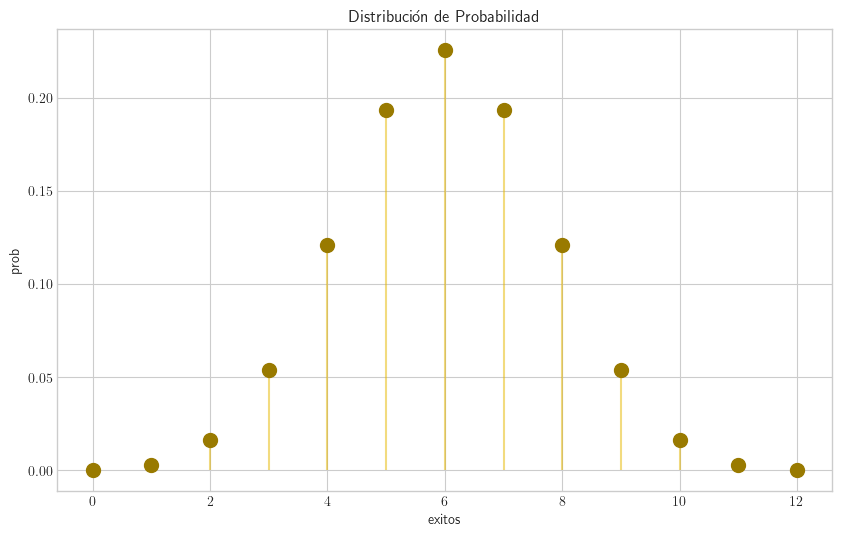

In [27]:
fig, ax = plt.subplots()

ax.vlines(x, 0, p,  linestyles='-', alpha=0.5, color='#e6b800')
ax.plot(x, p, marker='o', linestyle='None',
        color='#997a00',
       markersize=10)
ax.margins(0.05)
plt.title('Distribución de Probabilidad')
plt.xlabel('exitos')
plt.ylabel('prob')
plt.show()

La probabilidad acumulada de estos ensayos binomiales

In [32]:
cum_p = [stats.binom.cdf(i, 12, 0.5) for i in x]

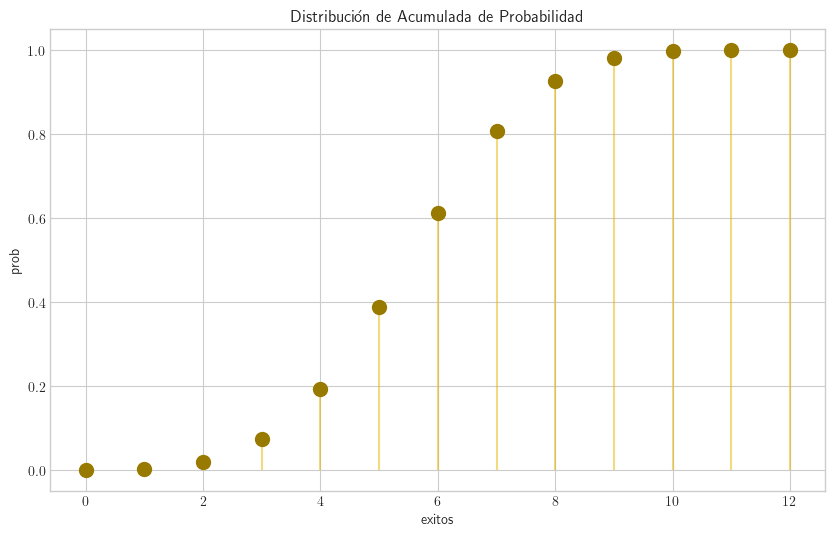

In [33]:
fig, ax = plt.subplots()

ax.vlines(x, 0, cum_p,  linestyles='-', alpha=0.5, color='#e6b800')
ax.plot(x, cum_p, marker='o', linestyle='None',
       markersize=10, color='#997a00')
plt.title('Distribución de Acumulada de  Probabilidad')
plt.xlabel('exitos')
plt.ylabel('prob')
plt.show()

### Valor Esperado:

El valor esperado de una variable aleatoria discreta se calcula con una expresión como la siguiente:

$$E(X) = \sum_{i=1}^n p_i \cdot v_i$$

Allí, $p_i$ es la probabilidad para el suceso cuyo valor es $v_i$.

En Python, esto se traduciría para el lanzamiento de una moneda, siendo una binomial:
$$E(X) = n \cdot p$$

Donde <i>n</i> es el número de ensayos y <i>p</i> la probabilidad, entonces:

In [62]:
# Para 12 ensayos y p = 0.5
12 * 0.5

6.0

Para un dado:

In [63]:
sum(1/6 * np.arange(1, 7))

3.5

Digamos que lanzamos el dado unas 1000 veces. Usando el modulo <i>Numpy</i>, puede simularse un experimento como ese:

In [64]:
np.random.seed(seed=0)
np.mean(np.random.choice([1, 2, 3, 4, 5, 6], size=1000))

3.519

Como se vé el promedio obtenido se acerca bastante al valor esperado.

### Varianza

La varianza de una variable aletori discreta es:

$$\sigma_X^2=Var(X)=E[(X - \mu_X)^2]=\sum_{i=1}^n(x_i-\bar{x})^2 \cdot p_i$$

Esa fórmula produciría el valor de la <i>varianza poblacional</i>, que el modulo <i>Numpy</i> se obtiene con el siguiente código:

In [51]:
np.array([1, 2, 3, 4, 5, 6]).var()

2.9166666666666665

Para obtener la varianza muestral, la fórmula correspondiente es:

$$S_X^2=\frac{(x_i - \bar{x})^2}{{n-1}}$$

Esa se obtiene, en <i>Numpy</i>, aadiendo el argumento <i>ddof</i>, que son los grados de libertad; al asignarle el valor $ddof=1$ se está diciendo que se le sustrae 1 grado de libertad por la estimación del parámetro 

In [52]:
np.array([1, 2, 3, 4, 5, 6]).var(ddof=1)

3.5

Usando el modulo <i>statistics</i>, también puede calcularse la varianza muestral y poblacional.

Este modulo viene integrado con la instalación de <i>Python</i>.

In [54]:
import statistics

In [55]:
# Varianza muestral 
statistics.variance([1, 2, 3, 4, 5, 6])

3.5

In [57]:
# Varianza poblacional

statistics.pvariance([1, 2, 3, 4, 5, 6])

2.9166666666666665

Sin embargo, si se trata de la  distribución de probabilidad binomial, la fórmula para la varianza es esta:

$$Var(X)=n \cdot p \cdot (1-p)$$

<p style="text-align:center">- n: número de ensayos.</p>

<p style="text-align:center">- p: probabilidad de éxito.</p>

Con <i>scipy.binom</i> puede calcularse directamente:

In [69]:
stats.binom.var(12, 0.5) == 12 * 0.5 * (1-0.5)

True

Es claro que también se puede obtener facilmente los resultados para los primeros cuatro <i>momentos</i>: media,
varianza, asimetria y kurtosis.

El siguiente es un ejemplo sacado de la documentación de <i>scipy</i>:

In [77]:
m, v, a, k = stats.binom.stats(12, 0.5, moments='mvsk')

print("Primeros 4 momentos para una binomial, con n={} y p= {}\n".format(12, 0.5))
print('Valor de la media: {}, Varianza: {}, Asimetria: {}, Kurtosis: {}'
     .format(m, v, a, k))

Primeros 4 momentos para una binomial, con n=12 y p= 0.5

Valor de la media: 6.0, Varianza: 3.0, Asimetria: 0.0, Kurtosis: -0.16666666666666666


### Valor Esperado y Varianza de una Variable Aleatoria Contínua.

En primer lugar, se debe considerar la función de densidad de probabilidad, que tiene esta forma:

$$P(a_1 \leq X \geq a_2)= \int_{a_1}^{a_2} f_X(x)\,dx$$

La cual define la probabilidad para $x$ dentro de un intervalo $[a_1, a_2]$, entonces el valor esperado es:


$$E(X)=\int_{a_1}^{a_2} x f_X(x)\,dx=\mu_X$$


<p style="text-align:center">Y la varianza</p>



$$Var(X)=\int_{a_1}^{a_2} (x-\mu_x)^2 f_X(x)\,dx=\mu_X$$



Para calcular una integral, <i>scipy</i> ofrece la función integrate.

In [34]:
from scipy.integrate import quad

Por ejemplo, la integral: 

$$P(2 \lt X \gt 6) = \int_{2}^{6} \frac{e^{-\frac{x}{{2}}}}{{2}}\,dx \approx 0.318$$

Según solución analítica, y usando <i>quad</i>

In [29]:
f = lambda x: np.exp(-x/2)/2

quad(f, 2, 6)


(0.3180923728035784, 3.5315347624418167e-15)

La función <i>quad</i> produce como resultado un <i>tuple</i> cuyo primer elemento es la solución de la integral y el segundo un <i>error absoluto</i>.

Para prescindir del error absoluto:

In [30]:
quad(f, 2, 6)[0]

0.3180923728035784

Si la variable aleatoria que representa la proporción de accidentes automovilísticos fatales, en un país, tiene la siguiente función:

$$f(x) =\begin{cases}  42x(1-x)^5\;\;\;0 \lt x \geq 1\\ \\ 0\;\;otro\;\;valor \end{cases}$$

Entonces el valor esperado será:

$$E(x) = 42 \int_{0}^{1} xf(x)\,dx=42 \int_{0}^{1} x^2(1-x)^2\,dx$$

<i>scipy.integrate.quad</i> da la siguiente solución:

In [38]:
f = lambda x: 42 * x**2 * (1-x)**5

quad(f, 0, 1)

(0.25, 2.7755575615628914e-15)

El valor esperado es $0.25$, para la proporción de accidentes fatales.

También es conocido que:

Una función $f(x)$ es la función de densidad de una variable $X$ si se cumple que:

 $$a)\;\;f(x) \geq 0 $$
 
$$b)\;\;\int_{-\infty}^{\infty}f(x)=1$$

$$c)\;\;P(a \leq X \geq b) =\int_{a}^{b}f(x)=1$$

El punto <i>b)</i>, es equivalente a que la sumatoria de todas las probabiliades es cero; sin embargo, en el caso de la función $f(x)$ descrita arriba; por definición se sabe que es cero cuando es evaluada fuera del intervalo $[0, 1]$, por lo que el cálculo con <i>scipy</i> del punto <i>b)</> es:

In [47]:
f = lambda x: 42 * x * (1-x)**5

quad(f, 0, 1)[0]

1.0